Implementation of Neural Network for Fashion MNIST Dataset by following Tensorflow Tutorial 

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_img,train_labels), (test_img,test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [4]:
train_img.shape

(60000, 28, 28)

In [5]:
train_img[0,23,23]

194

In [6]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
class_names = ["T_shirt / Top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

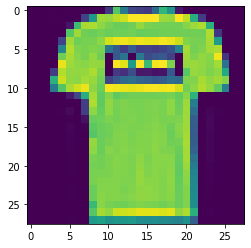

In [9]:
plt.figure()
plt.imshow(train_img[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
#squeeshing my values between 0 and 1
train_img = train_img / 255.0
test_img = test_img / 255.0

In [11]:
model = keras.Sequential(
    [keras.layers.Flatten(input_shape = (28,28)),
     keras.layers.Dense(128,activation="relu"),
     keras.layers.Dense(10,activation="softmax")]
)
# softmax function makes sure that all our values are between 0 and 1

hyper parameter tuning is like changing the values of number of neurons, activation, optimizer and loss values to observed model performance for different values

In [14]:
# optimizer perfrom gradient descent
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [17]:
model.fit(train_img,train_labels, epochs=1)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2307 - accuracy: 0.9145


verbose is how much we are looking at output in our console

In [18]:
test_loss, test_acc = model.evaluate(test_img,test_labels, verbose=1)
print("test accuracy : ", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3379 - accuracy: 0.8794
test accuracy :  0.8794000148773193


In [19]:
predictions = model.predict(test_img)

In [20]:
predictions[0]

array([1.07476744e-07, 6.89747859e-09, 1.24433242e-07, 4.71591377e-10,
       1.07180983e-06, 2.63040606e-03, 1.55866914e-07, 1.41940042e-02,
       9.04653206e-08, 9.83174026e-01], dtype=float32)

In [22]:
#argmax return index of max value in the list
np.argmax(predictions[0])

9

Sandal


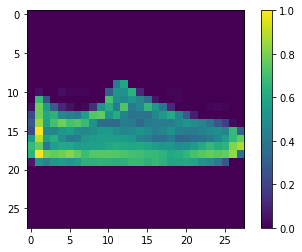

In [27]:
print(class_names[np.argmax(predictions[12])])
plt.figure()
plt.imshow(test_img[12])
plt.colorbar()
plt.grid(False)
plt.show()

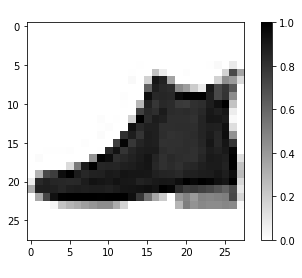

In [30]:
COLOR = "white"
plt.rcParams["text.color"] = COLOR
plt.rcParams["axes.labelcolor"] = COLOR

def predict(model, image,correct_label):
    class_names = ["T_shirt / Top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]
    
    show_image(image,class_names[correct_label], predicted_class )
    
def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img,cmap=plt.cm.binary)
    plt.title("Expected : "+label)
    plt.xlabel("Guess: "+guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()
    
def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0<= num <= 1000:
                return int(num)
            else:
                print("Try again...")

num = get_number()
image = test_img[num]
label = test_labels[num]
predict(model, image,label)

    
    

Dense neural network look and learn things globally unlike convolution neural network that learn locally.
output of dense neural network is just numeric values whereas CNN gives feature map as output that quantify the presence of filter at specific position
